<a href="https://colab.research.google.com/github/slothnojutsu/tripletreat/blob/main/Supervised_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progress Report #4: Supervised/Unsupervised Learning
**Course**: Introduction to Data Science  
**Team Members**:  
- Theresa Katele (tkatele@angelo.edu)  
- Aicha Ndir (andir@angelo.edu)  
- Seoyoung Jung (sysilove1526@gmail.com)  

**Date** : 11-24-2024

## Dataset Overview  
This dataset contains detailed metadata for a variety of TV shows. The data was sourced from TMDB and includes information about popularity, ratings, and user engagement metrics.  

**Key Features**:  
- **Numerical Features**:  
  - `popularity`: A numerical measure reflecting the show's popularity.  
  - `vote_average`: The average user rating on a numeric scale.  
  - `vote_count`: Total number of user votes or ratings.  

- **Categorical Features**:  
  - `name`: Title of the TV show.  
  - `first_air_date`: The release date of the show (can be transformed into release year for analysis).  
  - `overview`: A textual summary of the show's plot.  

This dataset is used to explore trends and predict success factors for TV shows, such as popularity and audience engagement, using regression, classification, and clustering techniques. For easy understanding, we will keep the name "movies" throughout the analysis, even though they are really TV Shows.

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from Google Drive
dataset_path = '/content/drive/MyDrive/Colab Notebooks/movies.csv'
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("Dataset loaded successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully!


## 1: Supervised Learning with K-Nearest Neighbors (KNN)

We will use the K-Nearest Neighbors (KNN) algorithm to classify movies as "popular" (1) or "not popular" (0) based on their vote_average and vote_count. The model's performance will be evaluated using metrics such as accuracy, precision, recall, and F1-score.

In [2]:
# Import necessary libraries for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a binary target variable
data['is_popular'] = (data['popularity'] > 300).astype(int)
X_knn = data[['vote_average', 'vote_count']]
y_knn = data['is_popular']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nAccuracy:", accuracy_score(y_test, y_pred_knn))


Confusion Matrix:
[[553  46]
 [127  87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       599
           1       0.65      0.41      0.50       214

    accuracy                           0.79       813
   macro avg       0.73      0.66      0.68       813
weighted avg       0.77      0.79      0.77       813


Accuracy: 0.7872078720787208


### **Model Performance**

1. **Confusion Matrix:**
   - **True Negatives (553):** The model correctly classified 553 movies as "not popular."
   - **False Positives (46):** The model incorrectly classified 46 "not popular" movies as "popular."
   - **False Negatives (127):** The model missed 127 "popular" movies.
   - **True Positives (87):** The model correctly classified 87 "popular" movies.

2. **Classification Report:**
   - **Class 0 (`not popular`):**
     - **Precision:** **81%** of movies predicted as "not popular" are actually "not popular."
     - **Recall:** **92%** of all "not popular" movies are correctly identified.
     - **F1-Score:** **86%,** showing strong performance for this class.
   - **Class 1 (`popular`):**
     - **Precision:** **65%** of movies predicted as "popular" are actually "popular."
     - **Recall:** **41%** of all "popular" movies are correctly identified.
     - **F1-Score:** **50%,** reflecting weaker performance for this class.
   - **Accuracy:** **78.72%** of all movies were classified correctly.

3. **Macro and Weighted Averages:**
   - **Macro Average (Unweighted):**
     - Precision: **73%**, Recall: **66%**, F1-Score: **68%.**
     - Indicates moderate overall performance across both classes.
   - **Weighted Average:**
     - Precision: **77%**, Recall: **79%**, F1-Score: **77%.**
     - Reflects better performance for the majority class (Class 0).

---

### **Key Insights**
- The KNN classifier performs well for the majority class (`not popular`), achieving high precision and recall.
- For the minority class (`popular`), performance is weaker, with a recall of only **41%**, indicating that the model struggles to correctly identify many "popular" movies.
- The overall accuracy of **78.72%** is decent, but the imbalance in class performance suggests room for improvement.


##2: Unsupervised Learning with K-Means Clustering
We will use K-Means clustering to group movies based on their `vote_average` and `vote_count`. The effectiveness of clustering will be evaluated using metrics like inertia and visualized in a scatter plot.


Cluster Centers:
[[7.69711327e+00 5.74792341e+02]
 [8.29582143e+00 1.16898571e+04]
 [8.05665333e+00 3.53680000e+03]]

Inertia (Sum of Squared Distances): 1836496141.3328366


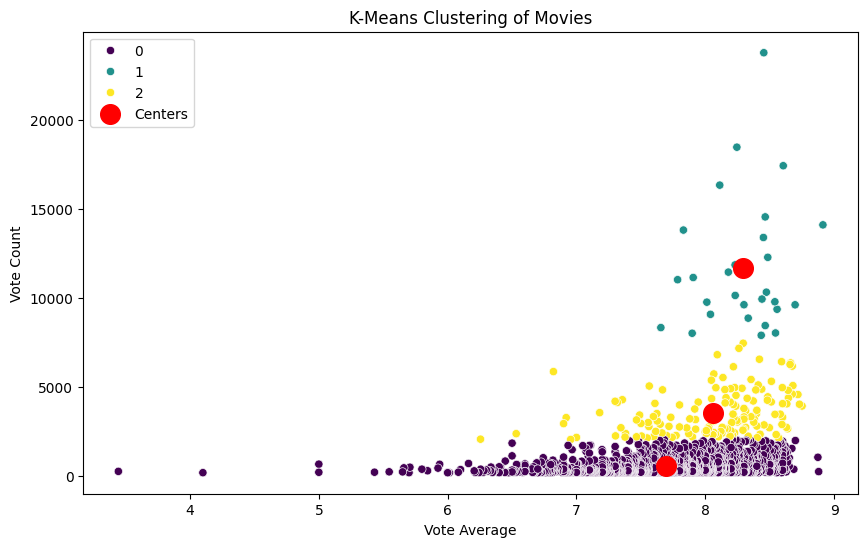

In [4]:
# Import necessary libraries for K-Means
from sklearn.cluster import KMeans
import seaborn as sns

# Select features for clustering
X_kmeans = data[['vote_average', 'vote_count']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Using 3 clusters
data['cluster'] = kmeans.fit_predict(X_kmeans)

# Evaluate the clustering
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("\nInertia (Sum of Squared Distances):", kmeans.inertia_)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='vote_average', y='vote_count', hue='cluster', data=data, palette='viridis'
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centers')
plt.title("K-Means Clustering of Movies")
plt.xlabel("Vote Average")
plt.ylabel("Vote Count")
plt.legend()
plt.show()


### **Interpretation of K-Means Clustering Results**

#### **Cluster Centers**
The centers of the three clusters are:
1. **Cluster 0:** Centered at `vote_average = 7.69` and `vote_count = 574.79`
2. **Cluster 1:** Centered at `vote_average = 8.29` and `vote_count = 11,689.86`
3. **Cluster 2:** Centered at `vote_average = 8.05` and `vote_count = 3,536.80`

**Interpretation:**
- **Cluster 0:** Represents movies with moderate `vote_average` and very low `vote_count`. These are likely low-popularity or niche movies.
- **Cluster 1:** Represents highly popular movies with high `vote_count` and very high `vote_average`. This cluster captures blockbusters or widely acclaimed films.
- **Cluster 2:** Represents movies with good `vote_average` and moderately high `vote_count`, potentially popular films but not blockbusters.

---

#### **Inertia (Sum of Squared Distances):** **1,836,496,141.33**
- Inertia measures how tightly grouped the data points are around their cluster centers. Lower inertia indicates better-defined clusters.
- An inertia value of over 1.8 billion suggests that while the clusters are somewhat distinct, there may still be overlapping or noisy data points.

---

#### **Scatter Plot Analysis**
- **Color-coded Clusters:**
  - **Purple (Cluster 0):** Low `vote_count` movies dominate this cluster, even if their `vote_average` varies.
  - **Yellow (Cluster 2):** Movies with higher `vote_count` but not in the highest range, representing a mix of popular but not extreme blockbusters.
  - **Teal (Cluster 1):** Dominates the region with the highest `vote_count`, representing blockbuster or highly popular films.
- **Red Dots (Cluster Centers):**
  - The red markers indicate the mean `vote_average` and `vote_count` values for each cluster, helping identify central tendencies.

---

#### **Key Insights**
1. **Cluster Differentiation:**
   - The clusters effectively group movies into distinct popularity levels based on `vote_average` and `vote_count`.
   - Movies in Cluster 0 are less popular, while Cluster 1 captures the most popular movies.

2. **Overlapping Areas:**
   - Some overlap between Clusters 0 and 2 in the middle `vote_count` range indicates that certain movies with similar `vote_average` scores could belong to either group.

3. **Cluster Centers:**
   - The difference in `vote_count` between clusters is the most significant factor distinguishing them, with `vote_average` playing a secondary role.
